Formal Definition of Simplicial Complex:

A tuple $(V, S)$ where $V$ is a finite set of vertices and $S$ is a set of non-empty subsets of $V$ where

\begin{align}
p \in V &\implies \{ p \} \in S \\
\sigma \in S, \tau \subseteq \sigma &\implies \tau \in S
\end{align}

So, let's look at the below simplicial complex:

![simplicial complex](simplicial_complex.jpg)
https://commons.wikimedia.org/wiki/File:Tetrahedron.jpg

We can see that the tetrahedron can be represented as

$V = \{0,1,2,3\}$ and
$S = \{ \{ 0 \}, \{1 \}, \{2 \}, \{3\}, \{0, 1\}, \{0, 2\}, \{0, 3\}, \{1, 2 \}, \{1, 3 \}, \{2, 3 \}, \{0, 1, 2 \}, \{0, 1, 3\}, \{0, 2, 3\}, \{1, 2, 3\}, \{0, 1, 2, 3 \} \}$.

Each element $\sigma \in S$ is called a *simplex* or *face* of a simplicial complex. Therefore, the simplex above can be considered a 3-simplex. 

We can look at a face of a simplex $\sigma$ as a subset of the vertices of $\sigma$. A *facet* is a face of maximal dimension and if $\sigma$ is a face of $\tau$, $\tau$ is a coface of $\sigma$. Lastly, the subset of simples of all the cofaces of $\sigma$ is the start of $\sigma$. We need to also look at $Lk(\sigma)$, which is the set of faces that do not share a vertex with $\sigma$ essentially.

However, representing these simplicial complexes as sets of sets leads to very inefficient manipulations. 

So, instead we use a simplex tree. This is a **trie**, which represents all of the simplices as strings in the trie.

Each simplex of the simplicial complex *K* is a word on the alphabet. The *j*-simplex is represented with length *j + 1*. The last label of the word representation of a simplex $\sigma$ is called *last($\sigma$)*. 

The simplex tree satisfies 3 properties:

1. The nodes of the simplex tree are in bijection with the simplices of the complex.
2. Each node of the tree stores the label of the vertex.
3. The vertex whose labels are encountered from the root to a node are associated with a simplex $\sigma$ are the vertices of $\sigma$. Labels are sorted in increasing order and each label appears no more than once.

The children of the root are the *top nodes*. Nodes with the same parent are sibling nodes. 

$D_m$ is the maximal number of operations needed to perform a search, an insertion or a removal in a dictionary of maximal size $\deg(T)$.

In [1]:
%matplotlib notebook
from pysimplextree.meshsimplextree import MyMeshSimplexTree
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from stl.mesh import Mesh

## Mesh Simplification without Homotopy Type Preservation

In [2]:
# Drawing Utilities

def plot_complex(simplicial_complex, hide_axes=False):
    ax, fig = simplicial_complex.plot(.6)
    # fig.set_size_inches(18.5, 10.5)
    if hide_axes:
        ax.set_axis_off()
    return ax, fig

In [12]:
mesh = Mesh.from_file("/home/ryan/Thesis/models/Dalek.stl")
t = MyMeshSimplexTree.from_mesh(mesh)

In [13]:
len(t.get_simplices(1))

9933

sum(1 for t in t1.keys() if len(t) == 3)

<IPython.core.display.Javascript object>


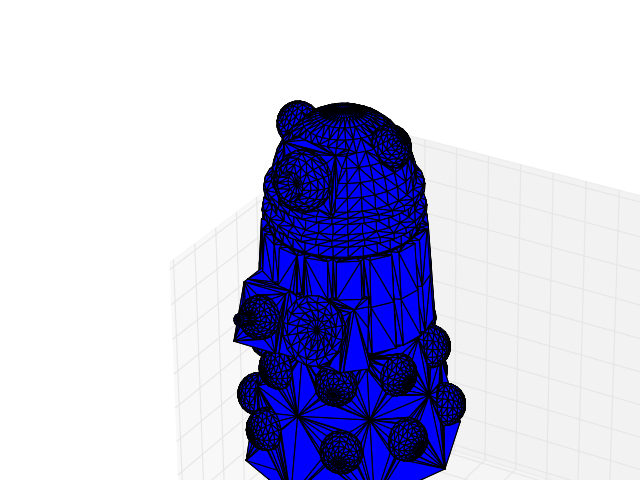

In [14]:
ax, fig = plot_complex(t, hide_axes = False)
fig.set_size_inches(10, 10)
plt.show()

In [19]:
t.mesh_simplify(500, verbose=True, keep_homotopy=False)

edges so far: 0
edges so far: 50
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 100
edges so far: 150
edges so far: 200
edges so far: 250
edges so far: 300


<IPython.core.display.Javascript object>


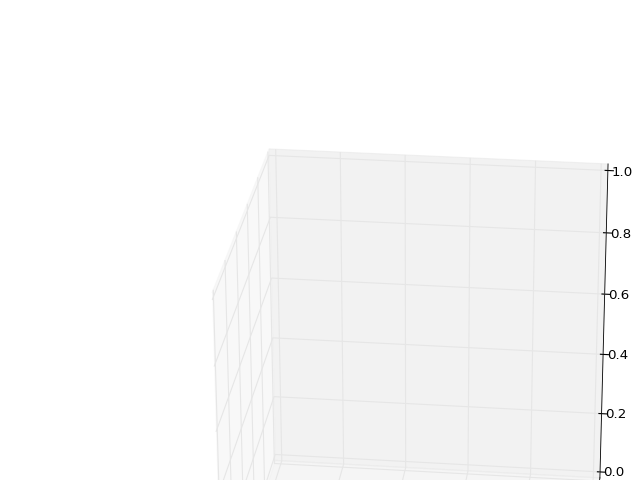

In [20]:
ax, fig = plot_complex(t, hide_axes = False)
fig.set_size_inches(10, 10)
plt.show()

t1.mesh_simplify(300, keep_homotopy=False)

<IPython.core.display.Javascript object>


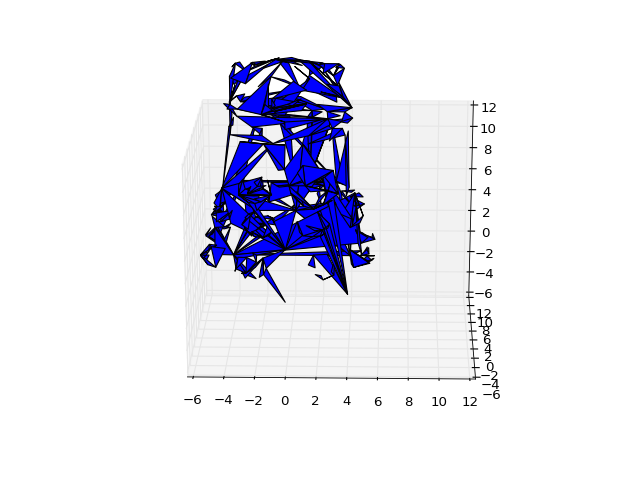

(<matplotlib.axes._subplots.Axes3DSubplot at 0x7f2863cfd0f0>,
 <matplotlib.figure.Figure at 0x7f2863cea2b0>)

In [20]:
plot_complex(t)

## Mesh Simplification without Homotopy Type Preservation